<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


*   Extract information from a given web site
*   Write the scraped data into a csv file.


## Extract information from the given web site

You will extract the data from the below web site: <br>


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import matplotlib.pyplot as plt

Download the webpage at the url


In [3]:
#your code goes here
data  = requests.get(url).text 

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table') # in html table is represented by the tag <table>

language_list = []
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() # store the value in column 3 as language_name
    salary = cols[3].getText() # store the value in column 4 as annual_average_salary
    language_list.append([language,salary])

# convert to dataframe:
df_lang = pd.DataFrame(language_list, columns=['Language','Average Annual Salary']) 

# save as csv:
filename = "popular-languages.csv"
df_lang.to_csv(filename, index=False)

# now print out the file:
df = pd.read_csv(filename, header=1) 
df

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [6]:
df['Average Annual Salary'].replace('[\$]','', regex=True, inplace=True)
df['Average Annual Salary'].replace('[\,]','', regex=True, inplace=True)
df[['Average Annual Salary']] = df[['Average Annual Salary']].astype('float')
#df.drop('0', axis=1, inplace=True)
df.head()

,Language,Average Annual Salary
0,Python,114383.0
1,Java,101013.0
2,R,92037.0
3,Javascript,110981.0
4,Swift,130801.0


In [7]:
df.sort_values('Average Annual Salary', ascending=False, inplace=True)
df = df.set_index('Language')
df

,Average Annual Salary
Language,
Swift,130801.0
Python,114383.0
C++,113865.0
Javascript,110981.0
Java,101013.0
Go,94082.0
R,92037.0
C#,88726.0
SQL,84793.0


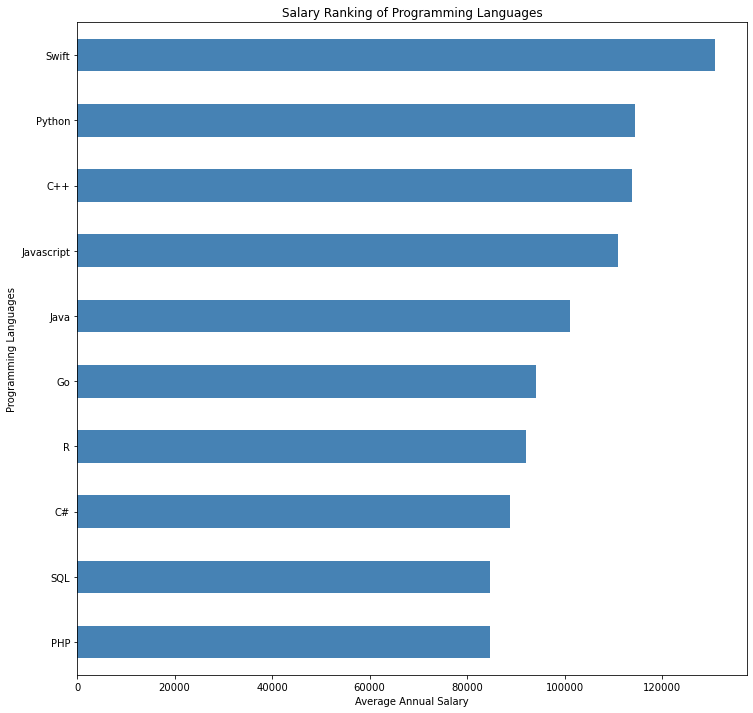

In [13]:
df = df.sort_values('Average Annual Salary')
df.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('Average Annual Salary')
plt.ylabel('Programming Languages')
plt.title('Salary Ranking of Programming Languages')
plt.legend().remove()
plt.show()

Save the scrapped data into a file named *popular-languages.csv*


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01).
